<a href="https://colab.research.google.com/github/artaasadi/NeuralNetwork_proj/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
cd AI_Project_Files/

[Errno 2] No such file or directory: 'AI_Project_Files/'
/content/drive/My Drive/Colab Notebooks/AI_Project_Files


In [91]:
# loading training set features
f = open("Datasets/train_set_features.pkl", "rb")
train_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=train_set_features2, axis=0)
train_set_features = train_set_features2[:, features_STDs > 52.3]

# changing the range of data between 0 and 1
train_set_features = np.divide(train_set_features, train_set_features.max())

# loading training set labels
f = open("Datasets/train_set_labels.pkl", "rb")
train_set_labels = pickle.load(f)
f.close()

# ------------
# loading test set features
f = open("Datasets/test_set_features.pkl", "rb")
test_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=test_set_features2, axis=0)
test_set_features = test_set_features2[:, features_STDs > 48]

# changing the range of data between 0 and 1
test_set_features = np.divide(test_set_features, test_set_features.max())

# loading test set labels
f = open("Datasets/test_set_labels.pkl", "rb")
test_set_labels = pickle.load(f)
f.close()

# ------------
# preparing our training and test sets - joining datasets and lables
train_set = []
test_set = []

for i in range(len(train_set_features)):
    label = np.array([0,0,0,0])
    label[int(train_set_labels[i])] = 1
    label = label.reshape(4,1)
    train_set.append((train_set_features[i].reshape(102,1), label))
    

for i in range(len(test_set_features)):
    label = np.array([0,0,0,0])
    label[int(test_set_labels[i])] = 1
    label = label.reshape(4,1)
    test_set.append((test_set_features[i].reshape(102,1), label))

# shuffle
random.shuffle(train_set)
random.shuffle(test_set)

# print size
print(len(train_set)) #1962
print(len(test_set)) #662

1962
662


In [92]:
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [4, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([4,1])

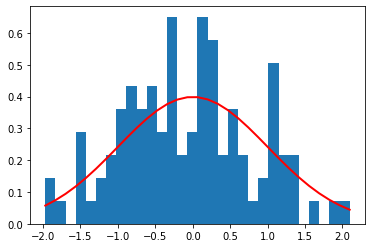

In [93]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(W1[2], 30, density=True)
plt.plot(bins, 1/(np.sqrt(2 * np.pi)) *
               np.exp( - (bins)**2 / 2 ),
         linewidth=2, color='r')
plt.show()

In [94]:
train_set200 = np.array(random.sample(train_set, 200))
test_set200 = np.array(random.sample(test_set, 200))
train_set = np.array(train_set)
test_set = np.array(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

In [95]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

counter = 0
for sample in train_set200 :
  a1 = sigmoid(W1 @ sample[0] + b1)
  a2 = sigmoid(W2 @ a1 + b2)
  a3 = sigmoid(W3 @ a2 + b3)
  if (np.argmax(a3) == np.argmax(sample[1])) :
    counter += 1
accuracy = (counter/200)
print(accuracy)

0.255


In [96]:
arr = np.arange(0,20)
np.random.shuffle(arr)
arr = np.array_split(arr,5)
arr

[array([12, 15, 16, 17]),
 array([11,  6, 13, 18]),
 array([ 7, 10,  8, 14]),
 array([1, 9, 2, 5]),
 array([ 0,  3,  4, 19])]

# BackPropagation


In [98]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set200)
  batches = np.array_split(train_set200, 200//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([4, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([4, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1

      # ---- Last layer
      # weight
      for j in range(W3_grad.shape[0]):
        for k in range(W3_grad.shape[1]):
          W3_grad[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
            # bias
      for j in range(b3_grad.shape[0]):
        b3_grad[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            # ---- 3rd layer
            # activation
      delta_3 = np.zeros((W3_grad.shape[1], 1))
      for k in range(W3_grad.shape[1]):
        for j in range(W3_grad.shape[0]):
          delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]
            
            # weight
      for k in range(W2_grad.shape[0]):
        for m in range(W2_grad.shape[1]):
          W2_grad[k, m] += delta_3[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            # bias
      for k in range(b2_grad.shape[0]):
        b2_grad[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            # ---- 2nd layer
            # activation
      delta_2 = np.zeros((W2_grad.shape[1], 1))
      for m in range(W2_grad.shape[1]):
        for k in range(W2_grad.shape[0]):
          delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]
            
            # weight
      for m in range(W1_grad.shape[0]):
        for v in range(W1_grad.shape[1]):
          W1_grad[m, v] += delta_2[m, 0] * a1[m,0] * (1 - a1[m, 0]) * sample[v, 0]
                    
            # bias
      for m in range(b1_grad.shape[0]):
        b1_grad[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
    W3 = W3 - (learning_rate * (W3_grad / batch_size))
    W2 = W2 - (learning_rate * (W2_grad / batch_size))
    W1 = W1 - (learning_rate * (W1_grad / batch_size))
        
    b3 = b3 - (learning_rate * (b3_grad / batch_size))
    b2 = b2 - (learning_rate * (b2_grad / batch_size))
    b1 = b1 - (learning_rate * (b1_grad / batch_size))
  cost_list.append(cost / 200)
  accuracy_list.append(accuracy / 200)

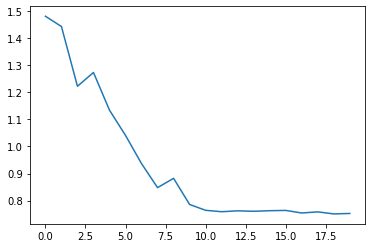

In [99]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list)
cost_list

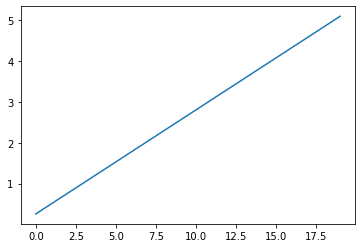

In [100]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list)
accuracy_list

ValueError: ignored

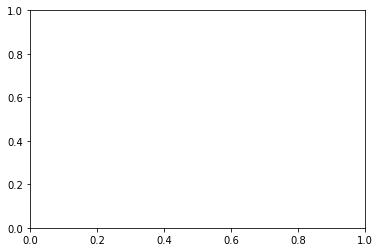

In [ ]:
for train_data in train_set200:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
#print(f"Accuracy: {number_of_correct_estimations / 100}")

array([[1.04461661e-03],
       [1.76760177e-03],
       [4.70852695e-05],
       [6.33193460e-04]])